Testing phase

In [1]:
import numpy as np


In [2]:
f_str = "x**2 + 2*x - 1"

x_min = -5
x_max = 5



In [3]:
x_values=np.linspace(x_min, x_max, 100)

In [4]:
def my_function(x):
    return x**2 + 2*x - 1

In [5]:
y_values=my_function(x_values)

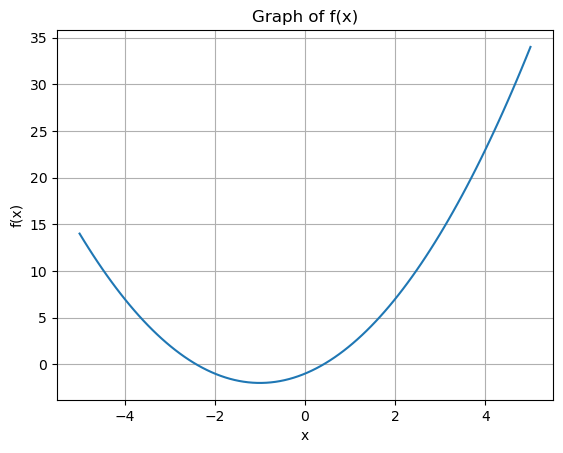

In [6]:
import matplotlib.pyplot as plt
plt.plot(x_values, y_values)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of f(x)")
plt.grid(True)
plt.show()

User Input version

Type your Cartesian Function (e.g., x**2 - 2*x + 1, sin(x), exp(x)): cos(2*x)
Type your lower x value: -6
Type your upper x value: 6


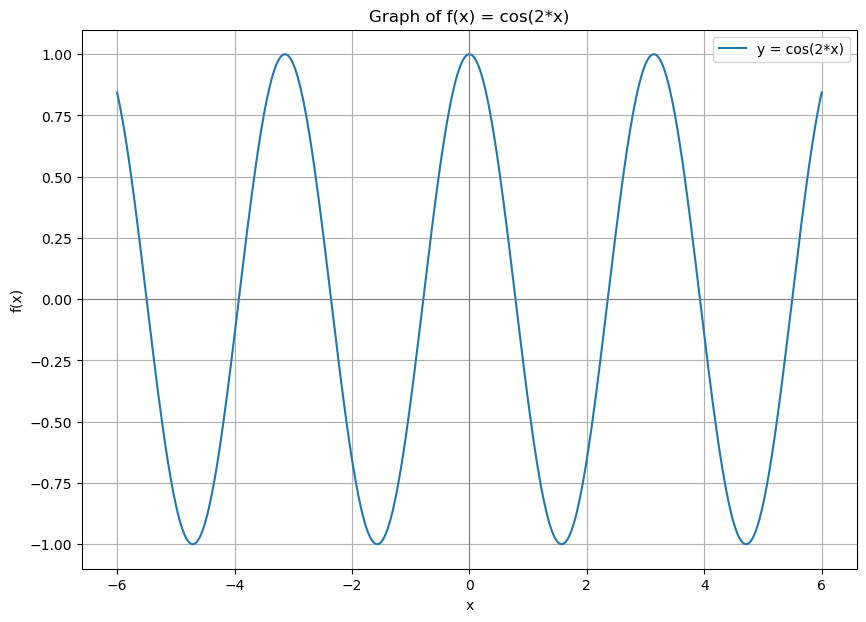

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sympify
from sympy.utilities.lambdify import lambdify

def function_grapher():
    # 1. Get user input for the function string
    function_str = input("Type your Cartesian Function (e.g., x**2 - 2*x + 1, sin(x), exp(x)): ")

    # 2. Get and convert user input for x range to numbers
    try:
        minimum_str = input("Type your lower x value: ")
        minimum = float(minimum_str)

        maximum_str = input("Type your upper x value: ")
        maximum = float(maximum_str)
    except ValueError:
        print("Invalid input for x values. Please enter numbers.")
        return # Exit the function if input is invalid

    # Basic validation for range
    if minimum >= maximum:
        print("Error: Lower x value must be less than upper x value.")
        return

    # 3. Generate x_values
    x_values = np.linspace(minimum, maximum, 500) # Increased points for smoother graph

    # 4. Use SymPy to parse and create a callable function
    x_sym = symbols('x') # Define 'x' as a symbolic variable
    try:
        # Parse the user's string into a sympy expression
        expr = sympify(function_str)

        # Convert the sympy expression into a fast Python function (works with numpy arrays)
        # 'numpy' is crucial here to make it compatible with np.linspace output
        f_callable = lambdify(x_sym, expr, 'numpy')

        # Calculate y_values using the callable function
        y_values = f_callable(x_values)

    except (SyntaxError, TypeError, NameError) as e:
        print(f"Error in function definition: {e}")
        print("Please ensure your function uses valid Python/mathematical syntax (e.g., x**2, np.sin(x), np.log(x)).")
        return # Exit the function if there's an error in the function string
    except Exception as e:
        print(f"An unexpected error occurred during function evaluation: {e}")
        return

    # 5. Plot the graph
    plt.figure(figsize=(10, 7)) # Adjust figure size for better viewing
    plt.plot(x_values, y_values, label=f'y = {function_str}')

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"Graph of f(x) = {function_str}")
    plt.grid(True)
    plt.axhline(0, color='grey', linewidth=0.8) # Add X-axis line
    plt.axvline(0, color='grey', linewidth=0.8) # Add Y-axis line
    plt.legend() # Show the function label
    plt.show()

# Call the function to run it
function_grapher()

GUI CREATION- utilising the code from above

In [28]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

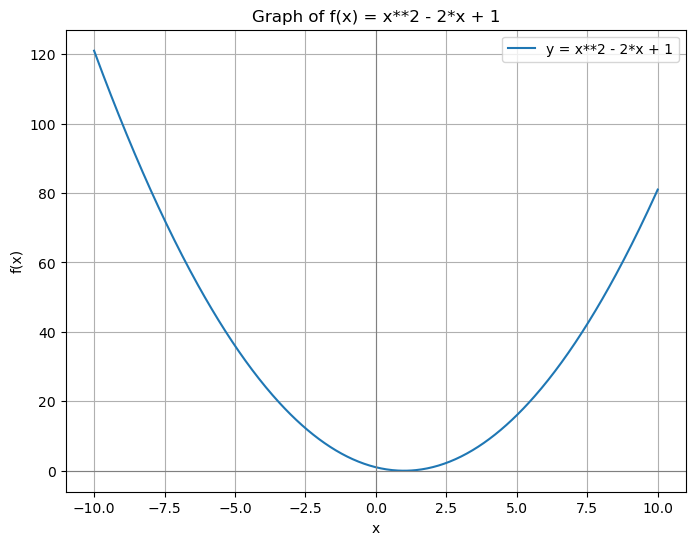

In [31]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
from sympy import symbols, sympify, lambdify

class EquationPlotterApp:
    def __init__(self, master):
        self.master = master
        master.title("Cartesian Function Plotter")

        # Input widgets for the function
        self.equation_label = tk.Label(master, text="Enter Cartesian Function (e.g., x**2, sin(x), exp(x)):")
        self.equation_label.pack(pady=5)
        self.equation_entry = tk.Entry(master, width=60)
        self.equation_entry.pack(pady=5)
        # Pre-fill with an example
        self.equation_entry.insert(0, "x**2 - 2*x + 1")

        # Input widgets for x range
        self.x_range_frame = tk.Frame(master)
        self.x_range_frame.pack(pady=5)

        self.min_x_label = tk.Label(self.x_range_frame, text="Lower x value:")
        self.min_x_label.pack(side=tk.LEFT, padx=5)
        self.min_x_entry = tk.Entry(self.x_range_frame, width=10)
        self.min_x_entry.pack(side=tk.LEFT, padx=5)
        self.min_x_entry.insert(0, "-10") # Default value

        self.max_x_label = tk.Label(self.x_range_frame, text="Upper x value:")
        self.max_x_label.pack(side=tk.LEFT, padx=5)
        self.max_x_entry = tk.Entry(self.x_range_frame, width=10)
        self.max_x_entry.pack(side=tk.LEFT, padx=5)
        self.max_x_entry.insert(0, "10") # Default value

        # Plotting button
        self.plot_button = tk.Button(master, text="Plot Function", command=self.plot_function)
        self.plot_button.pack(pady=10)

        # Matplotlib Figure and Canvas
        # Use plt.figure() and plt.subplots() explicitly to manage the figure and axes
        self.fig, self.ax = plt.subplots(figsize=(8, 6)) # Adjust figure size
        self.canvas = FigureCanvasTkAgg(self.fig, master=master)
        self.canvas_widget = self.canvas.get_tk_widget()
        self.canvas_widget.pack(pady=10, fill=tk.BOTH, expand=True) # Make it expand with window resizing

        # Output label (optional, for specific outputs or status messages)
        self.output_label = tk.Label(master, text="Status: Ready to plot.")
        self.output_label.pack(pady=5)

        # Initial plot (optional)
        self.plot_initial_graph()

    def plot_initial_graph(self):
        # Clear previous plot
        self.ax.clear()
        self.ax.set_title("Graph will appear here")
        self.ax.set_xlabel("x")
        self.ax.set_ylabel("f(x)")
        self.ax.grid(True)
        self.ax.axhline(0, color='grey', linewidth=0.8) # Add X-axis line
        self.ax.axvline(0, color='grey', linewidth=0.8) # Add Y-axis line
        self.canvas.draw()

    def plot_function(self):
        function_str = self.equation_entry.get()
        if not function_str:
            messagebox.showwarning("Input Error", "Please enter a function.")
            self.output_label.config(text="Status: No function entered.")
            return

        # Get and convert user input for x range
        try:
            minimum = float(self.min_x_entry.get())
            maximum = float(self.max_x_entry.get())
        except ValueError:
            messagebox.showerror("Input Error", "Invalid input for x values. Please enter numbers.")
            self.output_label.config(text="Status: Invalid x range input.")
            return

        # Basic validation for range
        if minimum >= maximum:
            messagebox.showerror("Input Error", "Error: Lower x value must be less than upper x value.")
            self.output_label.config(text="Status: Invalid x range (min >= max).")
            return

        # Generate x_values
        x_values = np.linspace(minimum, maximum, 500)

        # Use SymPy to parse and create a callable function
        x_sym = symbols('x')
        try:
            expr = sympify(function_str)
            f_callable = lambdify(x_sym, expr, 'numpy') # Use 'numpy' for compatibility with np arrays

            # Calculate y_values. Handle potential errors during calculation (e.g., log(0))
            y_values = f_callable(x_values)

            # Filter out infinite values (e.g., from log(0) or 1/0) for plotting aesthetics
            # Replace inf/-inf with NaN so Matplotlib doesn't try to plot huge lines
            y_values[np.isinf(y_values)] = np.nan

        except (SyntaxError, TypeError, NameError) as e:
            messagebox.showerror("Function Error", f"Error in function definition: {e}\n"
                                                  "Please ensure your function uses valid Python/mathematical syntax (e.g., x**2, sin(x), log(x)).")
            self.output_label.config(text=f"Status: Function error: {e}")
            return
        except Exception as e:
            messagebox.showerror("Evaluation Error", f"An unexpected error occurred during function evaluation: {e}")
            self.output_label.config(text=f"Status: Evaluation error: {e}")
            return

        # Clear previous plot
        self.ax.clear()

        # Plot the new function
        self.ax.plot(x_values, y_values, label=f'y = {function_str}')

        self.ax.set_title(f"Graph of f(x) = {function_str}")
        self.ax.set_xlabel("x")
        self.ax.set_ylabel("f(x)")
        self.ax.grid(True)
        self.ax.axhline(0, color='grey', linewidth=0.8)
        self.ax.axvline(0, color='grey', linewidth=0.8)
        self.ax.legend() # Show the function label

        # Redraw the canvas
        self.canvas.draw()
        self.output_label.config(text="Status: Function plotted successfully!")

# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = EquationPlotterApp(root)
    root.mainloop()